In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_excel('s2cbr.xlsx')
data.shape

(123, 12)

In [3]:
data.isnull().sum()

LL              0
PL              0
PI              0
OMC             0
MDD             0
TS              0
P1              0
P2              0
P3              0
P4              0
NO. OF LAYER    0
CBR             0
dtype: int64

In [4]:
data.head()

,LL,PL,PI,OMC,MDD,TS,P1,P2,P3,P4,NO. OF LAYER,CBR
0,0,0,0.0,11.0,3.36,20.0,0.0,0.0,0.8,0.0,1,103.0
1,0,0,0.0,10.0,5.36,20.0,0.0,0.5,0.0,0.0,1,74.0
2,0,0,0.0,10.0,4.83,20.0,0.0,0.0,0.8,0.0,1,104.0
3,0,0,0.0,11.0,4.98,20.0,0.0,0.5,0.0,0.0,1,75.0
4,0,0,0.0,12.0,3.97,20.0,0.0,0.0,0.8,0.0,1,105.0


In [5]:
x=data.drop(['CBR'],axis=1)
y=data['CBR']
x.shape, y.shape

((123, 11), (123,))

In [6]:
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [7]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [8]:
lr=LR()
lr.fit(train_x,train_y)

LinearRegression()

In [9]:
train_predict=lr.predict(train_x)
k=mae(train_predict,train_y)
print('Training MAE is ',k)

Training MAE is  8.467033080419082


In [10]:
test_predict=lr.predict(test_x)
k=mae(test_predict,test_y)
print('Training MAE is ',k)

Training MAE is  14.800269837045166


Text(0.5, 1.0, 'Coefficient plot')

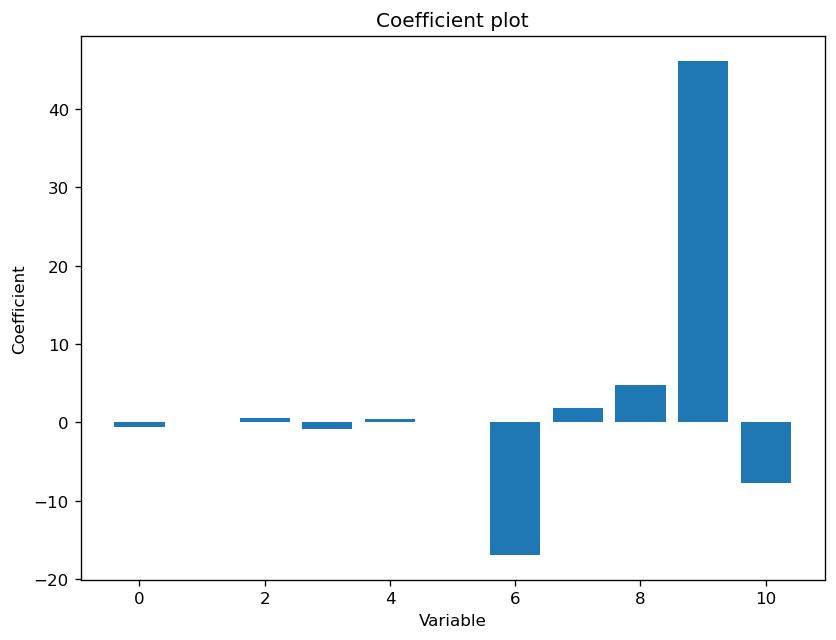

In [11]:
plt.figure(figsize=(8,6),dpi=120,facecolor='w',edgecolor='b')
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.title('Coefficient plot')

In [12]:
residuals=pd.DataFrame({'fitted values':test_y,'predicted value':test_predict})
residuals['residuals']=residuals['fitted values']-residuals['predicted value']
residuals.head()

,fitted values,predicted value,residuals
6,69.00,32.043684,36.956316
52,6.95,3.631196,3.318804
9,16.00,15.201623,0.798377
101,3.62,1.677019,1.942981
46,8.93,3.798984,5.131016


ValueError: x and y must be the same size

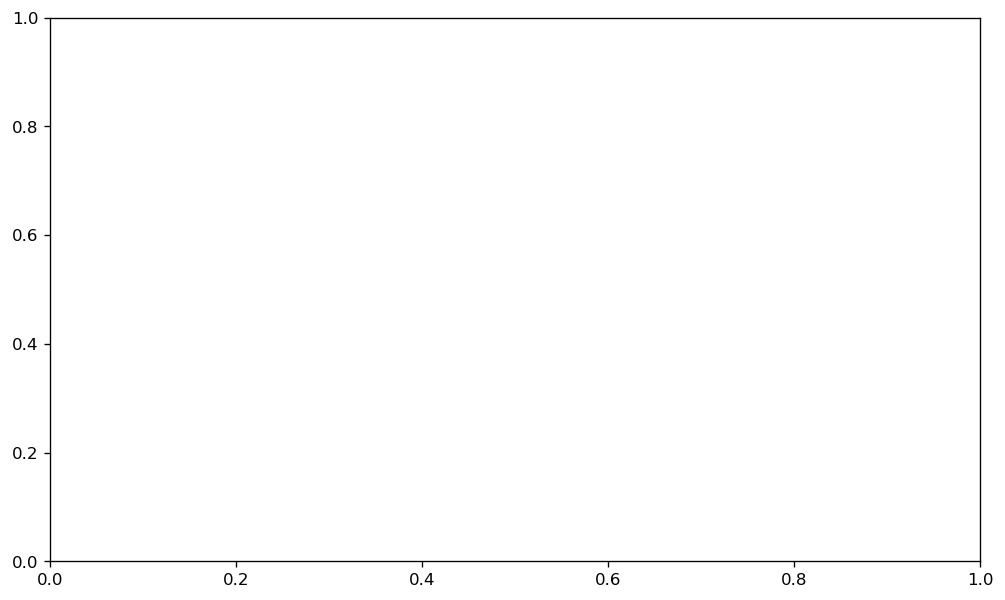

In [13]:
plt.figure(figsize=(10,6),dpi=120,facecolor='w',edgecolor='b')
f=range(0,2131)
k=[0 for i in range(0,2131)]
plt.scatter(f,residuals.residuals[:],label='residuals')
plt.plot(f,k,color='red',label='regression line')
plt.xlabel('Fitted points')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000,4000)
plt.legend()